In [0]:

from fastai.vision import *

In [0]:
folder = 'garfield'
file = 'urls_garfield.csv'

In [0]:
folder = 'shorthair'
file = 'urls_shorthair.csv'

In [8]:

path = Path('data/cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()

[PosixPath('data/cats/garfield'), PosixPath('data/cats/shorthair')]

In [10]:
classes = ['shorthair']
download_images(path/folder/file, dest, max_pics=200)

Error http://www.pawculture.com/uploads/cat-brds-britishshorthair-136989660.jpg HTTPSConnectionPool(host='www.chewy.com', port=443): Read timed out. (read timeout=4)


In [11]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

shorthair


cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000115.jpg'>
cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000150.jpg'>
cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000099.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000101.jpg'>
cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000137.jpg'>
cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000013.jpg'>
cannot identify image file <_io.BufferedReader name='data/cats/shorthair/00000008.jpg'>


In [0]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['garfield', 'shorthair']

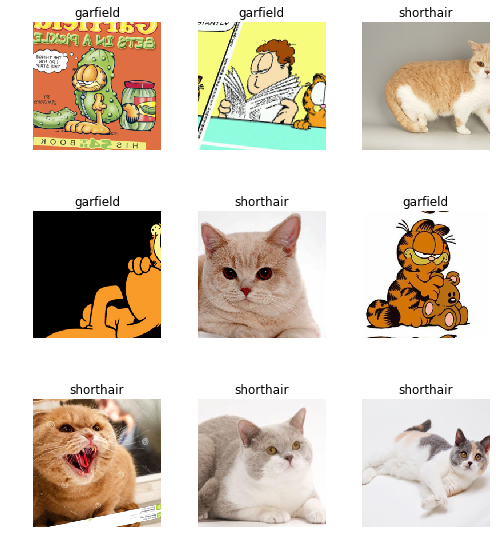

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['garfield', 'shorthair'], 2, 300, 75)

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 94682937.44it/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.646580,0.055763,0.013333,01:51
1,0.337350,0.005598,0.000000,01:54
2,0.223123,0.003026,0.000000,01:53
3,0.166188,0.002846,0.000000,01:53


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


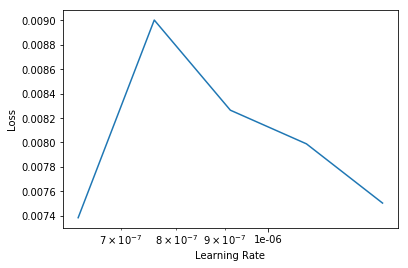

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, max_lr=slice(7e-7,9e-7))

epoch,train_loss,valid_loss,error_rate,time
0,0.006971,0.002740,0.000000,02:35
1,0.014511,0.002590,0.000000,02:35


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

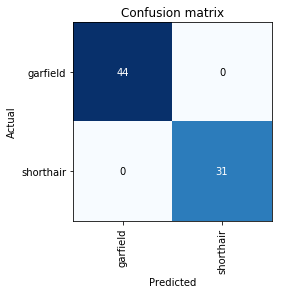

In [25]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

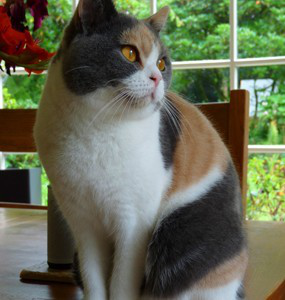

In [28]:
img = open_image(path/'shorthair'/'00000066.jpg')
img

In [0]:
learn = load_learner(path)

In [30]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category shorthair